In [55]:
# imports modules required for reading & analyzing data
import pandas as pd
import numpy as np
import matplotlib
import scipy.stats
from matplotlib import pyplot as plt
import scipy.stats.distributions as dist
%matplotlib inline

In [95]:
import seaborn as sns

In [56]:
# assigns umbrella parameters to create larger, higher-quality plots
plt.rcParams['figure.figsize'] = 15,7.5
plt.rcParams['font.size'] = 20

In [57]:
# creates 'quick code' function to read the .csv file 
car_data = pd.read_csv('jeep_vs_subaru.csv', delimiter=',', nrows=30)

In [58]:
def drop_unnamed(dataframe):
    r"""
    Data pre-processing for my own dataset.
    """
    # go through all columns and drop if "unnamed" is part of label.
    for num in range(len(dataframe.columns)):
        try:
            dataframe = dataframe.drop(columns='Unnamed: %i'%(num))
        except:
            pass        
    return dataframe

In [59]:
car_data = drop_unnamed(car_data)
car_data.columns

Index(['state', 'carmax_location', 'zip_code', 'jeep_odometer_miles',
       'jeep_asking_price', 'subaru_odometer_miles', 'subaru_asking_price'],
      dtype='object')

In [60]:
# prints dataframe
car_data.sort_values(by=['subaru_odometer_miles']).head()

,state,carmax_location,zip_code,jeep_odometer_miles,jeep_asking_price,subaru_odometer_miles,subaru_asking_price
26,new_mexico,albuquerque,87113,119453,7990,68916,11391
14,utah,salt_lake,84095,113094,7995,81449,8500
29,new_jersey,maple_shade,8502,85492,7995,81900,8999
2,colorado,colorado_springs,80922,151195,7195,84990,11719
16,conneticut,harford,6120,100432,7295,85482,8500


In [61]:
# reads only the columns defined within brackets 
car_data[['state', 'jeep_odometer_miles', 'jeep_asking_price']].head()

,state,jeep_odometer_miles,jeep_asking_price
0,oregon,113373,8999
1,maine,107775,6997
2,colorado,151195,7195
3,minnesota,117198,7999
4,north_carolina,101658,8135


In [62]:
# Prints series of objects instead of entire Data Frame
#car_data.jeep_odometer_miles

In [63]:
### Searches dataset for specific criteria within:
### (1) .column_name == (here: state)
### (2) 'search_criteria' (here: california)
car_data[car_data.state == 'california']

,state,carmax_location,zip_code,jeep_odometer_miles,jeep_asking_price,subaru_odometer_miles,subaru_asking_price
21,california,irvine,92618,99462,8995,95000,10500


# Preliminary Investigation into dataset

## Plot miles/price relationship

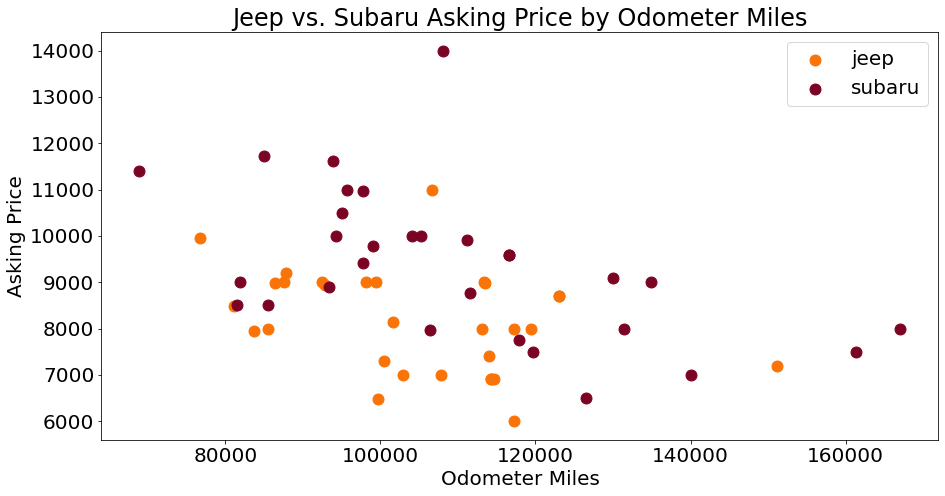

In [64]:
# assign series variables according to columns in the car_data set
jeep_miles = car_data['jeep_odometer_miles']
jeep_price = car_data['jeep_asking_price']

subaru_miles = car_data['subaru_odometer_miles']
subaru_price = car_data['subaru_asking_price']

# assign unique colors to Jeeps and Subarus
jeep_color, subaru_color = 'xkcd:orange', 'xkcd:wine red'

# plot a scatter plot
plt.scatter(jeep_miles, jeep_price, c=jeep_color, s=120, label='jeep')
plt.scatter(subaru_miles, subaru_price, c=subaru_color, s=120, label='subaru')
plt.legend()

plt.title('Jeep vs. Subaru Asking Price by Odometer Miles')
plt.xlabel('Odometer Miles')
plt.ylabel('Asking Price')

plt.savefig('figures/miles_price_scatter')
plt.show()

The first scatterplot is for purely subjective observation. As we can (subjectively) interpret from the scatter plot above, there is not some absurd difference between the asking prices nor odometer readings of the Jeeps and Subarus, but the Subarus do appear to tend a little bit higher in regard to asking price. 

# Histograms 

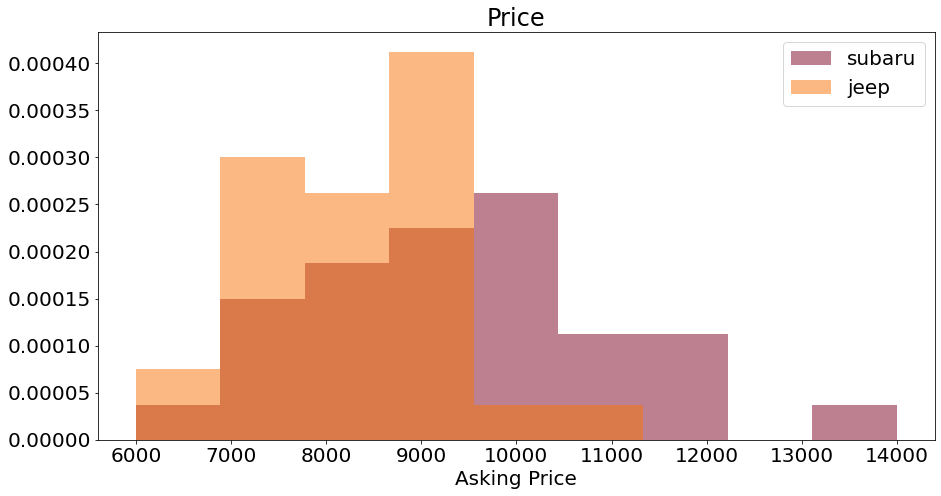

In [65]:
# create a histogram that groups ('bins') the Jeep vs. Subaru asking prices in 1000 dollar price brackets.
nbins = 10
prices = np.concatenate((subaru_price, jeep_price))
mn, mx = np.min(prices), np.max(prices)
my_bins = np.linspace(mn, mx, nbins)
plt.hist(subaru_price, bins=my_bins, color = subaru_color, alpha=0.5, label='subaru', density=True)
plt.hist(jeep_price, bins=my_bins, color = jeep_color, alpha=0.5, label='jeep', density=True)

plt.xlabel('Asking Price')
plt.legend()
plt.title('Price')

plt.savefig('figures/price_hist')
plt.show()

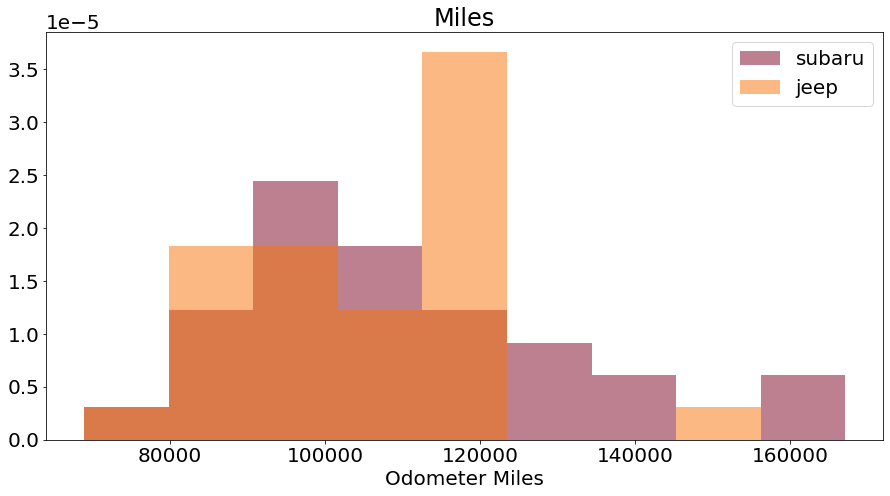

In [66]:
# create a histogram that groups ('bins') Jeep vs. Subaru according to miles
nbins = 10
miles = np.concatenate((subaru_miles, jeep_miles))
mn, mx = np.min(miles), np.max(miles)
my_bins = np.linspace(mn, mx, nbins)
plt.hist(subaru_miles, bins=my_bins, color = subaru_color, alpha=0.5, label='subaru', density=True)
plt.hist(jeep_miles, bins=my_bins, color = jeep_color, alpha=0.5, label='jeep', density=True)

plt.xlabel('Odometer Miles')
plt.legend()
plt.title('Miles')

plt.savefig('figures/miles_hist')
plt.show()

Once again, these histograms provide a means to visualize the data with a subjective lens. Much like the scatterplot, we can not make any true determinations with this histograms, but it does allow us to visualize similarities/differences in the data. We can see clearly different distributions between the Jeeps and the Subarus with both asking price and odometer reading, but this is likely a result of the small sample size (30). We now crave concrete statistics and analysis about the data, which brings us to our analysis:

# Analysis

## Basic Statistics

First, we should run through some basic statistics that allow us to compare and contrast the samples *subjectively*. There will be no turkey-trot TRQ tests here; just some plain old descriptive numbers and a statistician's bias.

In [67]:
# calculate the means for each car type's asking price
jeep_price_mean = jeep_price.mean()
subaru_price_mean = subaru_price.mean()

# calculate the means for each car type's mileage
jeep_miles_mean = jeep_miles.mean()
subaru_miles_mean = subaru_miles.mean()

# print with decimals rounded to 2 points, for American money is generally used on a 2-point percision (cents)
print("Jeep Mean Asking Price:", round(jeep_price_mean, 2), "dollars")
print("\nSubaru Mean Asking Price:", round(subaru_price_mean, 2), "dollars")
print("\nJeep Mean Odometer Reading:", round(jeep_miles_mean, 2), "miles")
print("\nSubaru Mean Odometer Reading:", round(subaru_miles_mean,2), "miles")

Jeep Mean Asking Price: 8169.23 dollars

Subaru Mean Asking Price: 9381.53 dollars

Jeep Mean Odometer Reading: 104626.97 miles

Subaru Mean Odometer Reading: 109269.37 miles


In [68]:
# create arrays from these series
jeep_miles_array = np.array(jeep_miles)
subaru_miles_array = np.array(subaru_miles)
jeep_price_array = np.array(jeep_price)
subaru_price_array = np.array(subaru_price)

# calculate the *sample* (thus 1 dof) standard deviations for reach car type's asking price
jeep_price_std = np.std(jeep_price_array, ddof=1)
subaru_price_std = np.std(subaru_price_array, ddof=1)

# calculate the *sample* (thus 1 dof) standard deviations for each car type's mileage
jeep_miles_std = np.std(jeep_miles_array, ddof=1)
subaru_miles_std = np.std(subaru_miles_array, ddof=1)

# print with decimals rounded to 2 points, for American money is generally used on a 2-point percision (cents)
print("Jeep Asking Price SD:", round(jeep_price_std, 2), "dollars")
print("\nSubaru Asking Price SD:", round(subaru_price_std, 2), "dollars")
print("\nJeep Odometer Reading SD:", round(jeep_miles_std, 2), "miles")
print("\nSubaru Odometer Reading SD:", round(subaru_miles_std, 2), "miles")

Jeep Asking Price SD: 1112.19 dollars

Subaru Asking Price SD: 1618.68 dollars

Jeep Odometer Reading SD: 16025.69 miles

Subaru Odometer Reading SD: 22754.72 miles


### Summmary

As we can observe *subjectively*, there are clear differences between the statistics--specifically the asking prices--of both the 2008 Jeep Libertys and the 2008 Subaru Outbacks. The 2008 Jeep Libertys have a clearly lower mean asking price (\\$8,169.23) than the 2008 Subaru Outbacks (\\$9,381.53). There could be a lot of factors that feed into this, including the original MSRP value of the car.

Although the Jeeps have a lower asking price, they do have a significantly lower standard deviation (\\$1,112.20 as opposed to the Subarus' \\$1,618.68). So, although the Jeeps are put up for sale for less, it might be initially predicted that their value retention is more predictable and consistant than the Subarus'. Yet, it feels like there is something we could do to test this thought. The Subarus do have a higher standard deviation of price, but they *also* have a higher standard deviation of milage. I wonder how the proportions of price std and mileage std compare against those of the Jeep...

In [69]:
scipy.stats.ttest_ind(subaru_miles_array,jeep_miles_array, equal_var = True) # Null hypothesis: Subaru mils = Jeep miles

Ttest_indResult(statistic=0.9136175845923031, pvalue=0.3647002040066184)

In [70]:
# We fail to reject the Null hypothesis, implying that there is *not* enough evidence to support that the Subarus
# and Jeeps have a statistically significant diference in odometer reading

In [71]:
# how do the jeep/subaru std price proportions compare to the jeep/subaru std mile proportions
price_std_proportion = jeep_price_std / subaru_price_std 
miles_std_proportion = jeep_miles_std / subaru_miles_std 

print("Proportion of Jeep/Subaru Price Standard Deviations:", price_std_proportion)
print("\nProportion of Jeep/Subaru Mileage Standard Deviations:", miles_std_proportion)

Proportion of Jeep/Subaru Price Standard Deviations: 0.6870994313707071

Proportion of Jeep/Subaru Mileage Standard Deviations: 0.7042798973248643


We can see that the standard deviation proportions of Jeep/Subaru are extremely close between price and mileage. The fact that the Subarus have a larger standard deviation (wider spread) of price than the Jeeps *is likely not* because of some inherent factor in the cars or the market, but can instead be explained almost entirely by the odometer differences that happened to come through on this sample. Thus, the evidence from this study contradicts my aforestatement that the Jeeps' "value retention may be more predictable and consistant than the Subarus'."

## Other Statistics


In [72]:
# use the original car_data set to create a new df that displays how many dollars each car is worth per
# mile on the odometer

# create two series from original dataframe
jeep_dollars_mile = car_data['jeep_asking_price']/car_data['jeep_odometer_miles']
subaru_dollars_mile = car_data['subaru_asking_price']/car_data['subaru_odometer_miles']

# place the series into dictionary then dataframe the dictionary
dollars_mile = {'subaru_dollars_mile': subaru_dollars_mile, 'jeep_dollars_mile': jeep_dollars_mile}
dollars_mile_df = pd.DataFrame(dollars_mile)
dollars_mile_df.head()

,subaru_dollars_mile,jeep_dollars_mile
0,0.089074,0.079375
1,0.095019,0.064922
2,0.137887,0.047588
3,0.112288,0.068252
4,0.098709,0.080023


In [73]:
# calculate the means for dollars per mile
jeep_dollars_mile_mean = jeep_dollars_mile.mean()
subaru_dollars_mile_mean = subaru_dollars_mile.mean()

jeep_dollars_mile_std = jeep_dollars_mile.std()
subaru_dollars_mile_std = subaru_dollars_mile.std()

#### calculate the std for dollars per mile for both cars

print("Jeep Average Dollars per Mile:",jeep_dollars_mile_mean)
print("Jeep Average Dollars per Mile Standard Deviation:",jeep_dollars_mile_std)
print("\nSubaru Average Dollars per Mile:", subaru_dollars_mile_mean)
print("Subaru Average Dollars per Mile Standard Deviation:", subaru_dollars_mile_std)
print("\n")

Jeep Average Dollars per Mile: 0.08048478035458503
Jeep Average Dollars per Mile Standard Deviation: 0.019486935357538

Subaru Average Dollars per Mile: 0.09080583824568508
Subaru Average Dollars per Mile Standard Deviation: 0.028596839015655004




So, according to our samples, the 2008 Subaru Outback is worth (on average) one cent (0.01 dollar) more per mile than the 2008 Jeep Liberty. Although this seems like a very miniscule amount, it surely adds up when the cars reach > 100,000 miles and there is a > 1000 dollar difference between the cars' asking prices.

#### Maybe now we could:
* compare MSRPs and mean prices of both cars
* percentage of decline from original MSRP
* etc. etc. etc.

# Outliers?

## 5 number summaries

In [127]:
def get_5_num_sum(data):
    quartiles = np.percentile(data, [25,50,75])
    lowest, highest = np.min(data), np.max(data)
    
    five_num = []
    five_num.append(lowest)
    quartiles = list(quartiles)
    five_num = five_num + quartiles
    five_num.append(highest)
    
    return(five_num)

In [132]:
def get_iqr(five_num_sum):
    q1 = five_num_sum[1]
    q3 = five_num_sum[3]
    iqr = q3-q1
    
    return(iqr)

In [ ]:
def check_for_outliers(data, five_num_sum):
    iqr = get_iqr(five_num_sum)
    
    for i,e in range(len(iqr))

In [131]:
# get the five number summaries (for IQR) for both miles and price for both jeeps and subarus
jeep_miles_5 = get_5_num_sum(jeep_miles)
jeep_price_5 = get_5_num_sum(jeep_price)

subaru_miles_5 = get_5_num_sum(subaru_miles)
subaru_price_5 = get_5_num_sum(subaru_price)

# Linear Regression

In [74]:
subaru_miles.to_numpy().reshape(-1,1).shape

(30, 1)

In [75]:
def vandermond_matrix(data):
    # if data is 1D, reshape it. 
    num_data_points = data.shape[0]
    A = np.column_stack( (np.ones(num_data_points), data))
    return A

In [76]:
ragazzo = np.column_stack(car_data)
ragazzo

array([['state', 'carmax_location', 'zip_code', 'jeep_odometer_miles',
        'jeep_asking_price', 'subaru_odometer_miles',
        'subaru_asking_price']], dtype='<U21')

In [77]:
subaru_miles = subaru_miles.to_numpy()

In [78]:
subaru_design_matrix = vandermond_matrix(subaru_miles)
jeep_design_matrix = vandermond_matrix(jeep_miles)

## Problem

$$
y = Ax
$$

where $A$ is the design matrix. $y$ is the thing you are trying to predict ("data") (price)

Regression: the "best" is given by the least squares solution. 

Numpy has an implementation already. `numpy.pinv`

In [79]:
subaru_price.to_numpy()
# subaru_design_matrix

array([ 9900,  9995, 11719, 10979,  9780, 13998,  6995, 10995,  9995,
        7761,  7500,  8777,  8999,  7498,  8500,  9588,  8500,  7988,
        6500,  9999,  9094, 10500,  9588,  7975,  9419,  8895, 11391,
        7995, 11624,  8999])

In [80]:
# the way we ordered this: first is intercept, second is slope. (y = b + mx)
def model_coeffs(design_matrix, signal):
    return np.linalg.pinv(design_matrix)@signal # 'pinv' is a pseudo inverse

subaru_coeffs = model_coeffs(subaru_design_matrix, subaru_price.to_numpy() )
jeep_coeffs = model_coeffs(jeep_design_matrix, jeep_price.to_numpy() )

In [81]:
# miles defined earlier.
plot_resolution = 1000
mn, mx = np.min(miles), np.max(miles)
miles_driven = np.linspace(mn, mx, plot_resolution)

In [82]:
# coeffs appear in array as [b,m] in y = mx + b
print("Subaru Coefficients: ",subaru_coeffs)
print("\nJeep Coefficients: ",jeep_coeffs) 

Subaru Coefficients:  [ 1.34946674e+04 -3.76421516e-02]

Jeep Coefficients:  [ 1.09388649e+04 -2.64714889e-02]


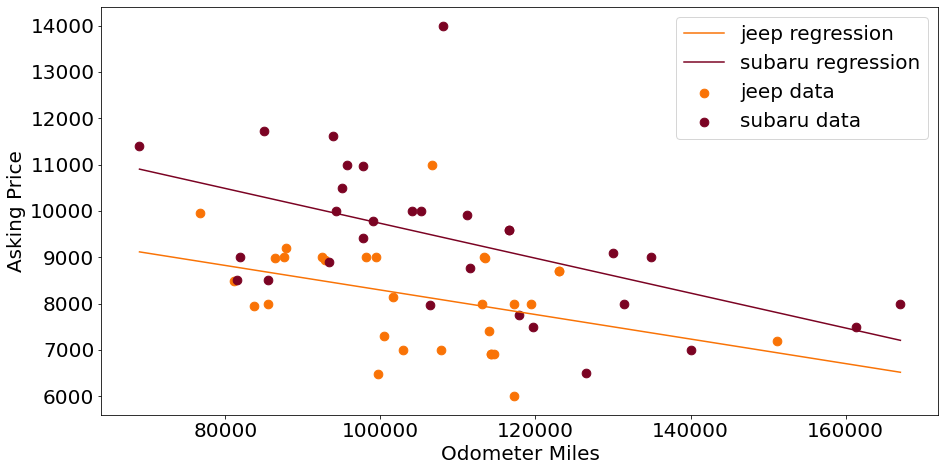

In [83]:
# fit a regression line to both jeep and subaru prices as a function of odometer miles. check for heteroskedasticity below

# calculate the Jeep and Subaru price predictions at any given mileage using above coeffs
jeep_price_predicted = (miles_driven*jeep_coeffs[1]) + jeep_coeffs[0]
subaru_price_predicted = miles_driven*subaru_coeffs[1] + subaru_coeffs[0]

# plot the regression line and the scatter plot for Jeeps
plt.plot(miles_driven, jeep_price_predicted, c=jeep_color, label='jeep regression')
plt.scatter(jeep_miles, jeep_price, c=jeep_color, s= 75, label='jeep data')

plt.plot(miles_driven, subaru_price_predicted, c=subaru_color, label='subaru regression')
plt.scatter(subaru_miles, subaru_price, c=subaru_color, s= 75, label='subaru data')

plt.xlabel('Odometer Miles')
plt.ylabel('Asking Price')
plt.legend()

plt.savefig('figures/miles_price_regression')
plt.show()

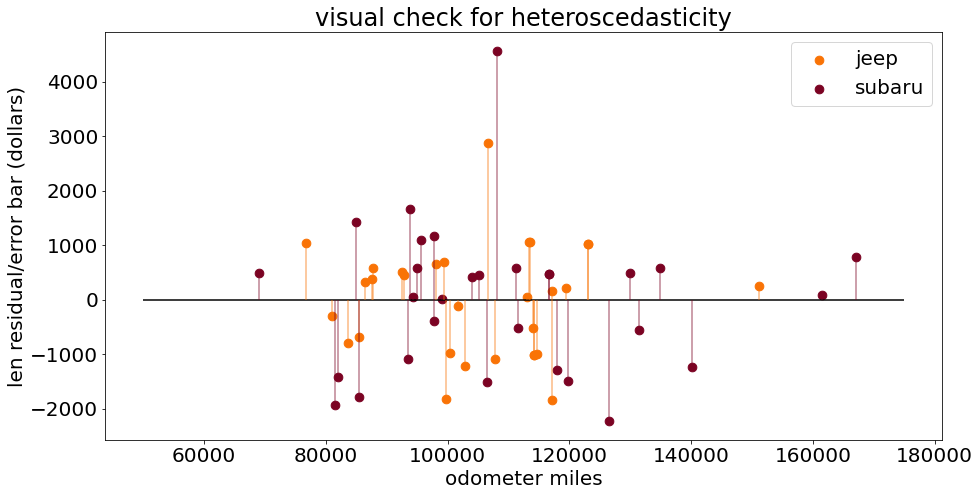

In [92]:
# check for heteroskedasticity in regression

# create a set of all 'residuals,' or the distance of the difference between the price prediction and the true value at each mileage
jeep_predicted_value = ((jeep_coeffs[0]) + ((jeep_coeffs[1] * jeep_miles)))
jeep_true_value = jeep_price
jeep_price_residual = jeep_true_value - jeep_predicted_value

subaru_predicted_value = ((subaru_coeffs[0]) + ((subaru_coeffs[1] * subaru_miles)))
subaru_true_value = subaru_price
subaru_price_residual = subaru_true_value - subaru_predicted_value

# conceptually / visually 'tilt' and 'shift' the entire regression graph so that the regression lines becomes zero,
# running along the x-axis, while the error bars maintain their distance from the regression line.

plt.hlines(0, 50000, 175000)

plt.scatter(jeep_miles, jeep_price_residual, c=jeep_color, s=75, label='jeep')
plt.vlines(jeep_miles, 0, jeep_price_residual, alpha = 0.5, color=jeep_color)

plt.scatter(subaru_miles, subaru_price_residual,c=subaru_color, s=75, label='subaru')
plt.vlines(subaru_miles, 0, subaru_price_residual, alpha = 0.5, color=subaru_color)

plt.legend()
plt.xlabel('odometer miles')
plt.ylabel('len residual/error bar (dollars)')
plt.title('visual check for heteroscedasticity')

plt.savefig("figures/heteroscedasticity")
plt.show()

Aside from two distinct outliers (Jeep: 10,995 dollars at 106,647 miles; Subaru: 13,998 dollars at 108,126 miles) and their consequential effects, the residuals maintain a relatively even and consistent spread. There is no clear development of deviation nor spreading on either side of the data. Thus, we choose to accept the linear fit.

# Normal Distributions

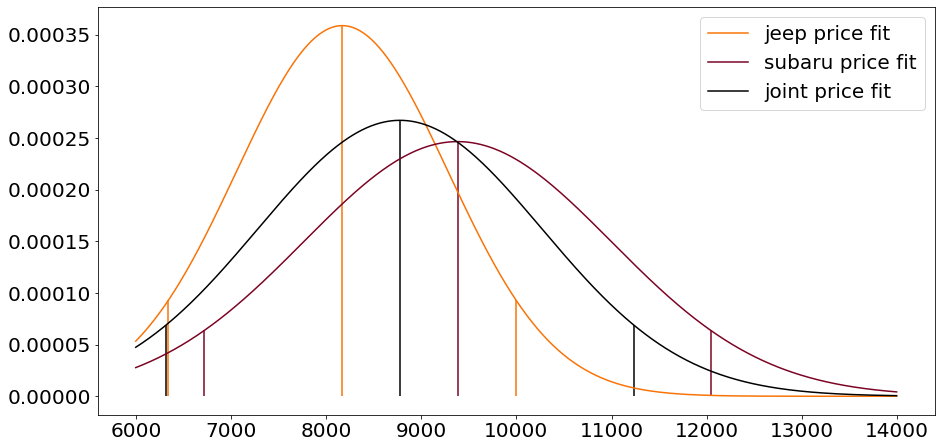

In [85]:
# plot three normal distributions, depicting the normal fit of jeep price, subaru price, and joint price
# plot each distribution with vertical lines marking its respective mean and p-values
jeep_normal_dist_price = dist.norm(loc=jeep_price.mean(), scale=jeep_price.std() )
subaru_normal_dist_price = dist.norm(loc=subaru_price.mean(), scale=subaru_price.std() )
joint_normal_dist_price = dist.norm(loc=prices.mean(), scale=prices.std() )

plot_resolution = 1000
mn, mx = np.min(prices), np.max(prices)
dollars = np.linspace(mn, mx, plot_resolution)

# elect a 0.1 alpha and later plot lines at these p-values
alpha = 0.1
jeep_confidence_interval = jeep_normal_dist_price.interval(1-alpha)
subaru_confidence_interval = subaru_normal_dist_price.interval(1-alpha)
joint_confidence_interval = joint_normal_dist_price.interval(1-alpha)

jeep_price_pred = jeep_normal_dist_price.pdf(dollars)
subaru_price_pred = subaru_normal_dist_price.pdf(dollars)
joint_price_pred = joint_normal_dist_price.pdf(dollars)

plt.plot(dollars, jeep_price_pred, label='jeep price fit', c=jeep_color)
plt.plot(dollars, subaru_price_pred, label='subaru price fit', c=subaru_color)
plt.plot(dollars, joint_normal_dist_price.pdf(dollars), label='joint price fit', c='k')


for i in range(2):
    plt.vlines(jeep_confidence_interval[i], 0, jeep_normal_dist_price.pdf(jeep_confidence_interval[i]), color=jeep_color)
    plt.vlines(subaru_confidence_interval[i], 0, subaru_normal_dist_price.pdf(subaru_confidence_interval[i]),  color=subaru_color)
    plt.vlines(joint_confidence_interval[i], 0, joint_normal_dist_price.pdf(joint_confidence_interval[i]))

jeep_normal_dist_price_mean = jeep_normal_dist_price.mean()
subaru_normal_dist_price_mean = subaru_normal_dist_price.mean()
joint_normal_dist_price_mean = joint_normal_dist_price.mean()

plt.vlines(jeep_normal_dist_price_mean, 0, jeep_normal_dist_price.pdf(jeep_normal_dist_price_mean), color=jeep_color)
plt.vlines(subaru_normal_dist_price_mean, 0, subaru_normal_dist_price.pdf(subaru_normal_dist_price_mean),  color=subaru_color)
plt.vlines(joint_normal_dist_price_mean, 0, joint_normal_dist_price.pdf(joint_normal_dist_price_mean))
plt.legend()

plt.savefig("figures/price_dist")
plt.show()

- shapiro failed to reject possibility of normality. it's possible our samples came from normals.
- so let's fit normal distributions. 
- these can now be treated kind of like approximated "populations" to sample from.

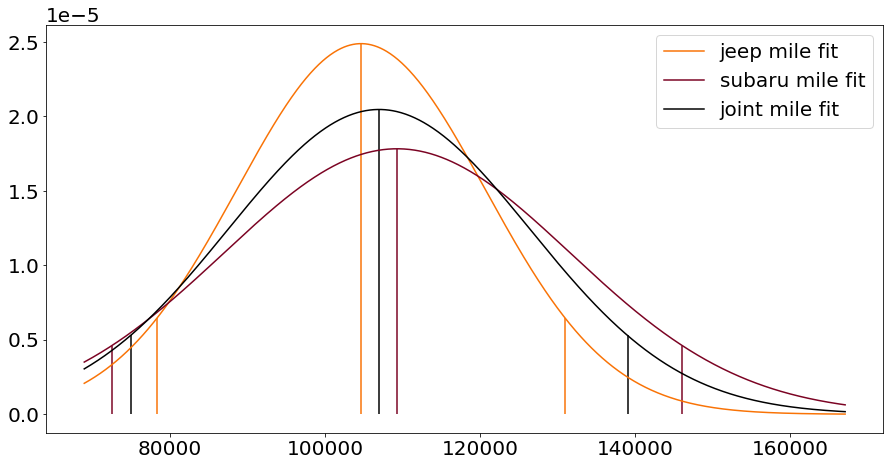

In [86]:
# plot three normal distributions, depicting the normal fit of jeep miles, subaru miles, and joint miles
# plot each distribution with vertical lines marking its respective mean and p-values
jeep_normal_dist_mile = dist.norm(loc=jeep_miles.mean(), scale=jeep_miles.std() )
subaru_normal_dist_mile = dist.norm(loc=subaru_miles.mean(), scale=subaru_miles.std() )
joint_normal_dist_mile = dist.norm(loc=miles.mean(), scale=miles.std() )

plot_resolution = 1000
mn, mx = np.min(miles), np.max(miles)
dollars = np.linspace(mn, mx, plot_resolution)

# elect a 0.1 alpha and later plot lines at these p-values
alpha = 0.1
jeep_confidence_interval = jeep_normal_dist_mile.interval(1-alpha)
subaru_confidence_interval = subaru_normal_dist_mile.interval(1-alpha)
joint_confidence_interval = joint_normal_dist_mile.interval(1-alpha)

jeep_mile_pred = jeep_normal_dist_mile.pdf(dollars)
subaru_mile_pred = subaru_normal_dist_mile.pdf(dollars)
joint_mile_pred = joint_normal_dist_mile.pdf(dollars)

plt.plot(dollars, jeep_mile_pred, label='jeep mile fit', c=jeep_color)
plt.plot(dollars, subaru_mile_pred, label='subaru mile fit', c=subaru_color)
plt.plot(dollars, joint_normal_dist_mile.pdf(dollars), label='joint mile fit', c='k')


for i in range(2):
    plt.vlines(jeep_confidence_interval[i], 0, jeep_normal_dist_mile.pdf(jeep_confidence_interval[i]), color=jeep_color)
    plt.vlines(subaru_confidence_interval[i], 0, subaru_normal_dist_mile.pdf(subaru_confidence_interval[i]),  color=subaru_color)
    plt.vlines(joint_confidence_interval[i], 0, joint_normal_dist_mile.pdf(joint_confidence_interval[i]))

# assign means for each dataset/distribution
jeep_normal_dist_mile_mean = jeep_normal_dist_mile.mean()
subaru_normal_dist_mile_mean = subaru_normal_dist_mile.mean()
joint_normal_dist_mile_mean = joint_normal_dist_mile.mean()

# plot vertical lines at mean and p-values for each distribution accoring to variables assigned above
plt.vlines(jeep_normal_dist_mile_mean, 0, jeep_normal_dist_mile.pdf(jeep_normal_dist_mile_mean), color=jeep_color)
plt.vlines(subaru_normal_dist_mile_mean, 0, subaru_normal_dist_mile.pdf(subaru_normal_dist_mile_mean),  color=subaru_color)
plt.vlines(joint_normal_dist_mile_mean, 0, joint_normal_dist_mile.pdf(joint_normal_dist_mile_mean))
plt.legend()

plt.savefig('figures/miles_dist')
plt.show()

# Tests

In [87]:
# This section needs to be cleaned up. It's supposed to have the t-tests to test for statistical significance

Our null-hypothesis assumes that there is no statistically significant difference between the used asking price of the 2008 Jeep Libertys and 2008 Subaru Outbacks. In the normal distributions above we had elected a 0.10 alpha, but for a stricter assesment of our t-test we will assume a 0.01 alpha.

In [88]:
# run a t-test comparing the asking price of Jeeps vs Subarus
# we assume equal variance as false because the aforementioned standard deviations are clearly distinct,
# and so scipy.stats.ttest_ind will run Welch's t-test instead of a standard t-test
scipy.stats.ttest_ind(subaru_price, jeep_price, equal_var=False)

Ttest_indResult(statistic=3.3809600940166527, pvalue=0.001386882150564184)

The t-test returns a p-value of 0.0014 (rounded up), and thus we choose to reject the null-hypothesis, implying that the variability (difference) in the mean asking-price for used 2008 Subaru Outbacks and 2008 Jeep Libertys is not purely due to chance.

If it is not due to chance, what is it due to? The first factor that comes to mind is, ofcourse, odometer mileage, which luckily we have data for. How do we address this, then? 

Well, if we run another t-test between the Subaru mileage and the Jeep mileage, we can once again try to determine if the variablilty is simply due to chance, or if there is a statistically significant difference betweent the mileages. If there is a statistically significant difference between the mileages, it is hard to determine whether it is the mileage or the vehicle make/model itself that is responsible for the difference between the prices. However, if there *isn't* a statistically significant difference between the mileages, it is safer for us to assume the make/model difference is the factor repsonsible for the difference in price.

Thus, this null-hypothesis assumes there is no statistically significant difference btween the odometer mileage of the 2008 Jeep Libertys and 2008 Subaru Outbacks. Allow us to asses this with a larger alpha (0.10) so that our assesment is more sensitive to minor differences; we hope to evaluate whether it is the vehicle make/model itself--not the mileage--that is responsible for differences, so in this circumstance a larger alpha actually makes for a more conservative assesment.

In [89]:
scipy.stats.ttest_ind(subaru_miles, jeep_miles, equal_var=False)

Ttest_indResult(statistic=0.9136175845923031, pvalue=0.3651275291733391)

The t-test returns a p-value of 0.365 (rounded down), and thus we fail to reject the null-hypothesis, and we are therefore comfortable assuming that the variablilty in mileage is due to chance (natural sampling variablity), and not some inherent difference in the cars. This assesment adds extra credibility to the Jeep vs. Subaru price t-test.

In [90]:
scipy.stats.shapiro(subaru_price), scipy.stats.shapiro(jeep_price)

((0.9688223004341125, 0.5074750185012817),
 (0.9534995555877686, 0.2095884382724762))

p>0.05, so we fail to reject the null hypothesis.
The null hypothesis was that prices are normally distributed.


In [91]:
scipy.stats.shapiro(subaru_price_residual), scipy.stats.shapiro(jeep_price_residual)

((0.9085631966590881, 0.013691679574549198),
 (0.9505169987678528, 0.17453503608703613))

According to the Wilk Shapiro test, whose null hypothesis states that the data could be normal, subarus reject the null (implying possible heteroscedasticity), while jeeps fail to reject the null (implying less factor-dependent variation)